# Coursework: Climate data analysis

In [1]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from sklearn.metrics import mean_squared_error, mean_absolute_error

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [2]:
df = pd.read_pickle("weather-denmark-resampled.pkl")

In [3]:
print(df.columns)
#print(df)

MultiIndex([( 'Aalborg',      'Temp'),
            ( 'Aalborg',  'Pressure'),
            ( 'Aalborg', 'WindSpeed'),
            ( 'Aalborg',   'WindDir'),
            (  'Aarhus',      'Temp'),
            (  'Aarhus',  'Pressure'),
            (  'Aarhus', 'WindSpeed'),
            (  'Aarhus',   'WindDir'),
            ( 'Esbjerg',      'Temp'),
            ( 'Esbjerg',  'Pressure'),
            ( 'Esbjerg', 'WindSpeed'),
            ( 'Esbjerg',   'WindDir'),
            (  'Odense',      'Temp'),
            (  'Odense',  'Pressure'),
            (  'Odense', 'WindSpeed'),
            (  'Odense',   'WindDir'),
            ('Roskilde',      'Temp'),
            ('Roskilde',  'Pressure'),
            ('Roskilde', 'WindSpeed'),
            ('Roskilde',   'WindDir')],
           )


In [4]:
print(df.shape)

(333110, 20)


In [5]:
################################### 
# i.How many cities are there in the dataset?
#
# There are 5 cities
#
###################################

In [6]:
###############################
# ii.How many observations and features are there in this dataset?
#
# There are 333110 observations and 4 features
#
###############################

In [7]:
###############################
# iii.What are the names of the different features?
#
# Temp, Pressure, WindSpeed, WindDir
#
###############################

**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**



In [8]:
###########################
# Removing missing values
new_df = df.dropna()

# Comparing changes in the number of observations
print(df.shape[0])
print(new_df.shape[0])
print(df.shape[0] - new_df.shape[0])

###########################

333110
332070
1040


**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

In [9]:
###########################
cities = ['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']
features = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']

for c in cities:
    print(c + " statistics")
    print("*************************")
    for f in features:
        print(f + " - max: " + "{:.1f}".format(new_df[(c, f)].max()) + ", min: " 
              + "{:.1f}".format(new_df[(c, f)].min()) + ", median: " 
              + "{:.1f}".format(new_df[(c, f)].median()) + ", mean: " 
              + "{:.1f}".format(new_df[(c, f)].mean()) + ", std: " 
              + "{:.1f}".format(new_df[(c, f)].std()))
    print("*************************")
    print("")
    
print("The maximum WindSpeed property of Odense can be classified " +
      "as an anomaly.")
print("Its value is 62.5, while the same property for " +
      "all the other cities range between 25.0 and 39.1.")
print("")
print("The median WindSpeed property of Aarhus can also be classified " +
      "as an anomaly.")
print("Its value is 3.6, while the same property for " + 
      "all the other cities lie strictly")
print("between 4.4 and 4.6 which is a difference of over 20%.")
print("")
print("The mean WindSpeed property of Aarhus can also be " +
      "classified as an anomaly for similar reasons.")
print("Its value is 4.0 compared to the other cities which have mean " +
      "WindSpeed values of 4.8 and 4.9.")

###########################

Aalborg statistics
*************************
Temp - max: 30.8, min: -25.0, median: 8.1, mean: 8.3, std: 7.0
Pressure - max: 1050.8, min: 951.9, median: 1013.4, mean: 1012.7, std: 11.7
WindSpeed - max: 32.9, min: 0.0, median: 4.6, mean: 4.9, std: 2.8
WindDir - max: 360.0, min: 10.0, median: 210.0, mean: 192.4, std: 88.0
*************************

Aarhus statistics
*************************
Temp - max: 30.9, min: -24.3, median: 8.0, mean: 8.3, std: 7.0
Pressure - max: 1050.0, min: 955.5, median: 1014.0, mean: 1013.3, std: 11.3
WindSpeed - max: 33.4, min: 0.0, median: 3.6, mean: 4.0, std: 2.5
WindDir - max: 360.0, min: 10.0, median: 213.3, mean: 201.4, std: 82.1
*************************

Esbjerg statistics
*************************
Temp - max: 54.0, min: -27.0, median: 8.3, mean: 8.6, std: 6.7
Pressure - max: 1049.3, min: 959.3, median: 1014.1, mean: 1013.1, std: 10.9
WindSpeed - max: 39.1, min: 0.0, median: 4.5, mean: 4.9, std: 2.7
WindDir - max: 360.0, min: 10.0, median: 216.7, mean: 2

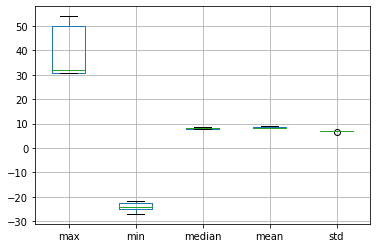

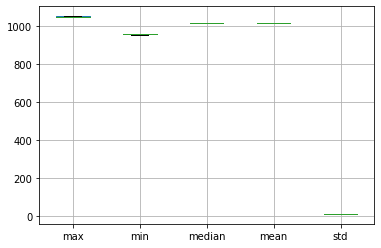

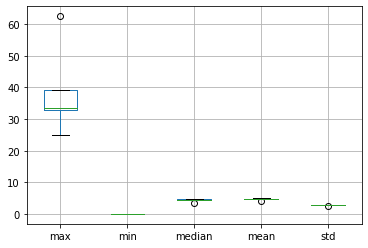

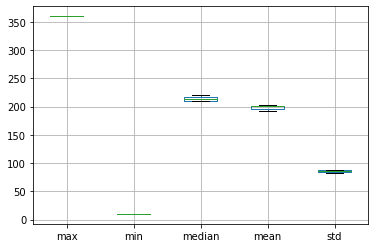

In [10]:
data = {
    "Temp": [],
    "Pressure": [],
    "WindSpeed": [],
    "WindDir": [],
}

for c in cities:
    for f in features:
        data[f].append([new_df[(c, f)].max(), new_df[(c, f)].min(), new_df[(c, f)].median(), new_df[(c, f)].mean(), new_df[(c, f)].std()])

df = pd.DataFrame(data["Temp"], columns=['max', 'min', 'median', 'mean', 'std'])
df.plot.box(grid='True')

df = pd.DataFrame(data["Pressure"], columns=['max', 'min', 'median', 'mean', 'std'])
df.plot.box(grid='True')

df = pd.DataFrame(data["WindSpeed"], columns=['max', 'min', 'median', 'mean', 'std'])
df.plot.box(grid='True')

df = pd.DataFrame(data["WindDir"], columns=['max', 'min', 'median', 'mean', 'std'])
df.plot.box(grid='True')

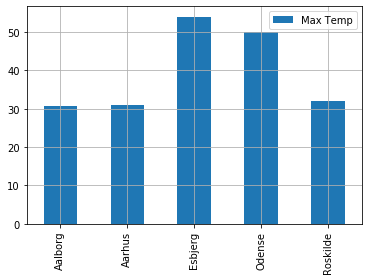

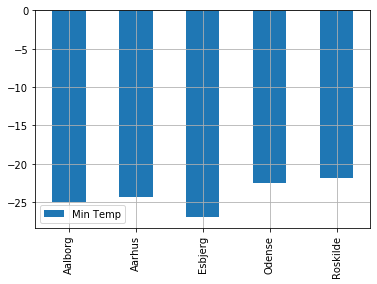

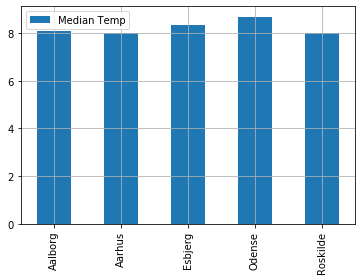

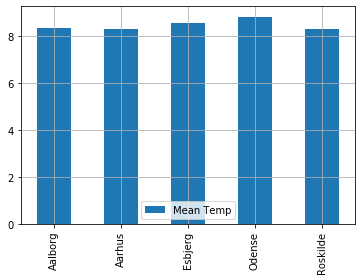

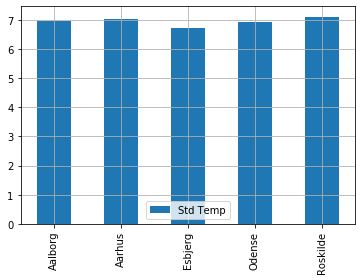

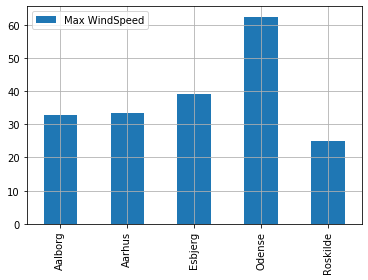

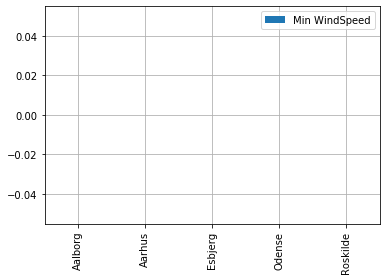

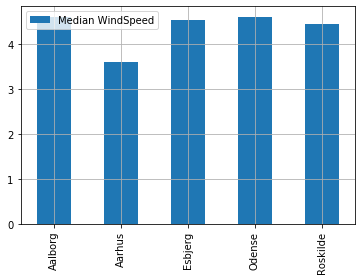

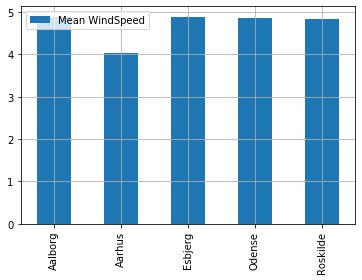

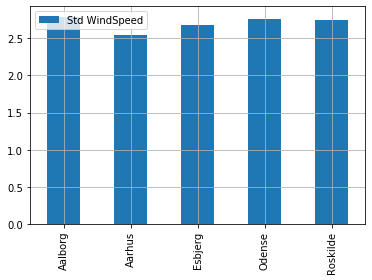

In [11]:
cities = ['Aalborg', 'Aarhus', 'Esbjerg', 'Odense', 'Roskilde']

data = {
    "Temp": { "max": [], "min": [], "median": [], "mean": [], "std": [] },
    "Pressure": { "max": [], "min": [], "median": [], "mean": [], "std": [] },
    "WindSpeed": { "max": [], "min": [], "median": [], "mean": [], "std": [] },
    "WindDir": { "max": [], "min": [], "median": [], "mean": [], "std": [] }
}

for c in cities:
    for f in features:
        data[f]["max"].append(new_df[(c, f)].max())
        data[f]["min"].append(new_df[(c, f)].min())
        data[f]["median"].append(new_df[(c, f)].median())
        data[f]["mean"].append(new_df[(c, f)].mean())
        data[f]["std"].append(new_df[(c, f)].std())

df = pd.DataFrame(data["Temp"]["max"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Max Temp"]);

df = pd.DataFrame(data["Temp"]["min"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Min Temp"]);

df = pd.DataFrame(data["Temp"]["median"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Median Temp"]);

df = pd.DataFrame(data["Temp"]["mean"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Mean Temp"]);

df = pd.DataFrame(data["Temp"]["std"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Std Temp"]);


df = pd.DataFrame(data["WindSpeed"]["max"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Max WindSpeed"]);

df = pd.DataFrame(data["WindSpeed"]["min"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Min WindSpeed"]);

df = pd.DataFrame(data["WindSpeed"]["median"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Median WindSpeed"]);

df = pd.DataFrame(data["WindSpeed"]["mean"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Mean WindSpeed"]);

df = pd.DataFrame(data["WindSpeed"]["std"], index=cities)
ax = df.plot.bar(grid='True')
ax.legend(["Std WindSpeed"]);



## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*


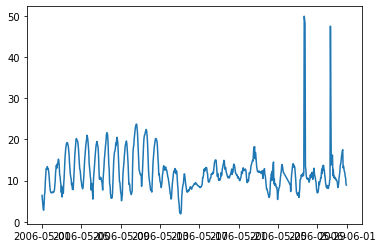

In [12]:
temp_may_2006_odense = new_df[('Odense', 'Temp')].loc[(new_df.index >= '2006-05-01') & (new_df.index < '2006-06-01')]
plt.plot(temp_may_2006_odense)
plt.show()

**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

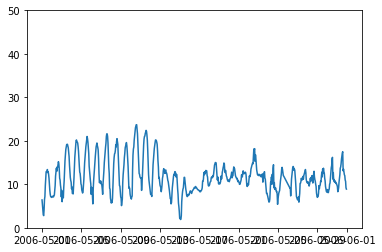

In [13]:
# Find outliers - any data point that is beyond 
# 3 standard deviations from the mean
mean = temp_may_2006_odense.mean()
std = temp_may_2006_odense.std()

# Calculate the lower and upper bounds defined by 
# 3 standard deviations away from the mean
lower_bound  = mean - (std * 3)
upper_bound = mean + (std * 3)

# Set outliers to NaN value

temp_may_2006_odense.loc[(temp_may_2006_odense < lower_bound) | (temp_may_2006_odense > upper_bound)] = np.nan

# Linearly interpolate missing data (NaN)
temp_may_2006_odense = temp_may_2006_odense.interpolate()

# Plot results
plt.plot(temp_may_2006_odense)
plt.ylim(0, 50)
plt.show()

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [14]:
#################################
df = pd.read_pickle("df_perth.pkl")
print(df.columns)
#################################

Index(['temp', 'pressure', 'relative humidity', 'wind speed', 'cloud cover',
       'precipitation', 'PV production', 'diffuse radiation, tilt',
       'solar azimuth'],
      dtype='object')


**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

                             temp  pressure  relative humidity  wind speed  \
temp                     1.000000 -0.000713          -0.761345    0.343214   
pressure                -0.000713  1.000000          -0.253514    0.007968   
relative humidity       -0.761345 -0.253514           1.000000   -0.340895   
wind speed               0.343214  0.007968          -0.340895    1.000000   
cloud cover             -0.090391 -0.782275           0.272694   -0.060845   
precipitation           -0.062609 -0.245895           0.175913   -0.011236   
PV production            0.529136  0.162544          -0.646227    0.249162   
diffuse radiation, tilt  0.440259 -0.216266          -0.459441    0.194775   
solar azimuth            0.360599 -0.001735          -0.428187    0.269784   

                         cloud cover  precipitation  PV production  \
temp                       -0.090391      -0.062609       0.529136   
pressure                   -0.782275      -0.245895       0.162544   
relative 

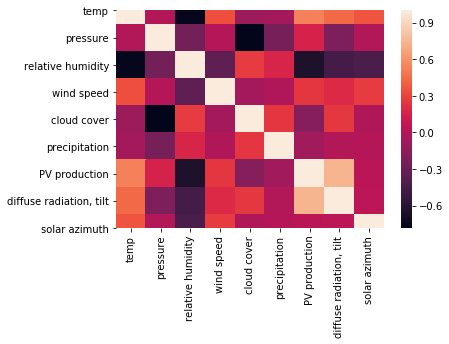

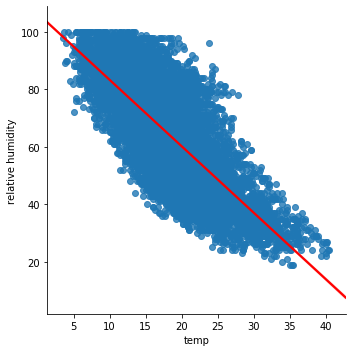

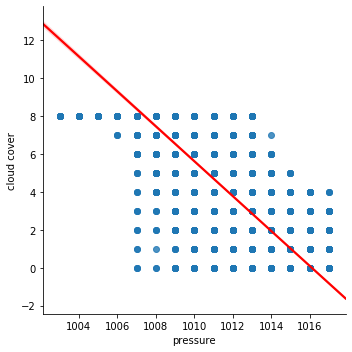

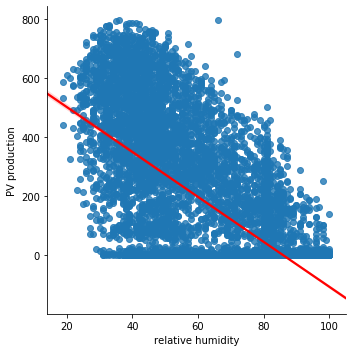

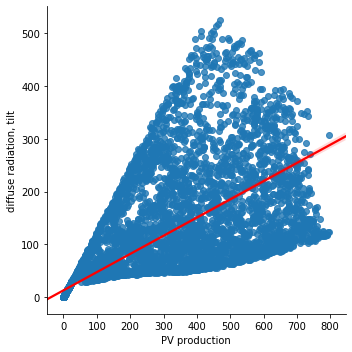

In [15]:
#################################
import seaborn as sns
corr = df.corr(method='pearson')
print(corr)
sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns)

sns.lmplot(x='temp',y='relative humidity',data=df,fit_reg=True, line_kws={'color': 'red'}) 
sns.lmplot(x='pressure',y='cloud cover',data=df,fit_reg=True, line_kws={'color': 'red'}) 
sns.lmplot(x='relative humidity',y='PV production',data=df,fit_reg=True, line_kws={'color': 'red'}) 
sns.lmplot(x='PV production',y='diffuse radiation, tilt',data=df,fit_reg=True, line_kws={'color': 'red'}) 

# We used the Seaborn library to generate a heatmap of the correlations of the dataset. 
# From the Heatmap we found 4 pairs of features which have strong correlation:
# Temp vs Relative Humidity, Pressure vs Cloud Cover, and Relative Humidity vs PV Production, 
# which have strong negative correlation.
# And PV production vs Diffuse Radiation, Tilt which has a strong positive correlation.
# These four correlations were displayed on a scatter plot with a regression line which 
# was generated using the Seaborn library function.

#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

             cloud cover  heavy rain
cloud cover     1.000000    0.246993
heavy rain      0.246993    1.000000


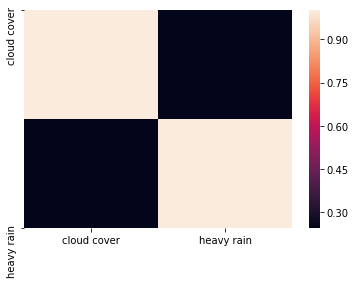

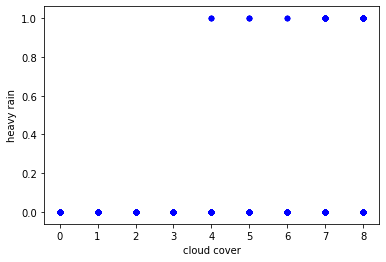

In [16]:
#################################

df['heavy rain'] = [0 if x < 1 else 1 for x in df['precipitation']]
new_df = df.drop(['temp', 'pressure', 'relative humidity', 'wind speed',
       'precipitation', 'PV production', 'diffuse radiation, tilt',
       'solar azimuth'], axis=1)
corr = new_df.corr()
print(corr)

sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns)

new_df.plot(kind='scatter',x='cloud cover',y='heavy rain',color='blue')
plt.show()

#

#################################

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

In [19]:
#################################
#Correlations are patterns in the data, which makes it possible to use the value of one variable to predict another variable.
#Hence, if we want to predeict the photovoltaic production (PV production), we need to find features which are highly correlated
#to PV production. Hence, we looked at the heatmap and found that the features, 'diffuse radiation, tilt' is the most
#postitively correlated with the value over 0.6 and 'temp' is the second highest postive correlated (around 0.4). 
#Furthermore, 'relative humidity' is the highest negatively correlated to PV production with a correlation value more than -0.6. Therefore, the two features
#It suggests that PV production is highly dependent to these features,hence the two features,'diffuse radiation, tilt' and 
#'relative humidity' are statistically significant to be used for predicting the PV production using linear regression.

#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

[1.60225543]
53.24572235762703
                            OLS Regression Results                            
Dep. Variable:          PV production   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        07:49:28   Log-Likelihood:                -56269.
No. Observations:                8760   AIC:                         1.125e+05
Df Residuals:                    8758   BIC:                         1.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

C:\Users\edwardkim\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


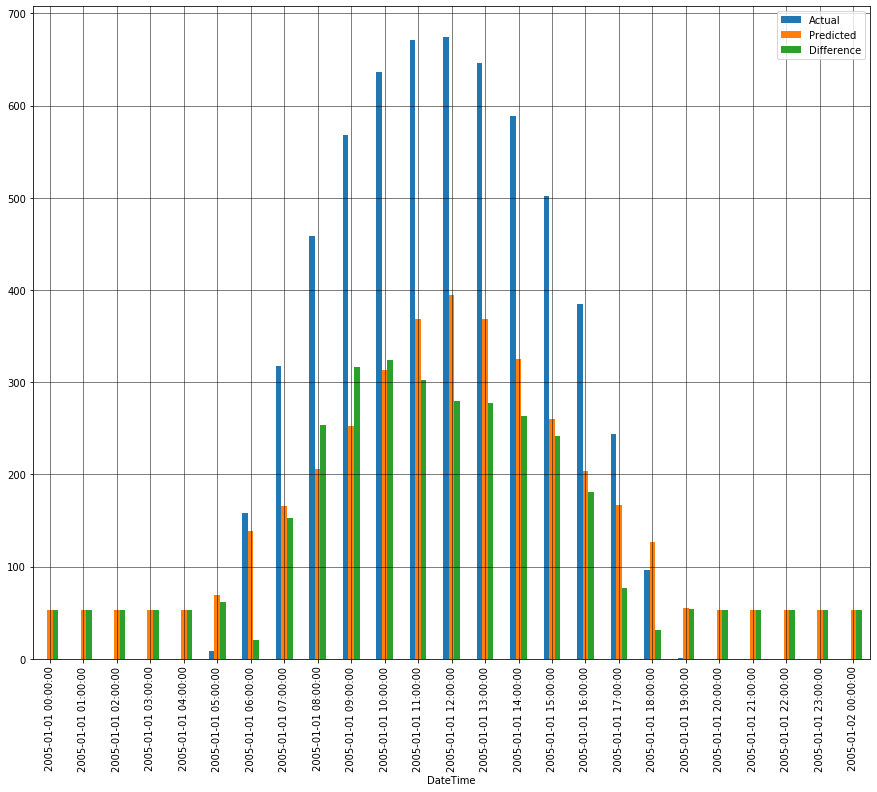

In [27]:
#################################
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

data = pd.read_pickle("df_perth.pkl")

data_x = data[['diffuse radiation, tilt']] #'diffuse radiation, tilt', 'relative humidity',
data_y = data['PV production']

#data_x, data_x2, data_y, data_y2 = train_test_split(data_x,data_y)
regr = linear_model.LinearRegression()
regr.fit(data_x,data_y)
pv_pred= regr.predict(data_x)
print(regr.coef_)
print(regr.intercept_)

X = sm.add_constant(data_x) # adding a constant
model = sm.OLS(data_y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

df = pd.DataFrame({'Actual': data_y, 'Predicted': pv_pred, 'Difference': abs(pv_pred - data_y)})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,12))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#################################